# Project: Investigate the Dataset "No-show at medical appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient and the timing of scheduling and the appointment are included in each row.

In [112]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# magic words
%matplotlib inline

# load the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [76]:
# Print of the first 5 lines
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Show the shape
df.shape

(110527, 14)

In [5]:
# Basic stastics description of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [3]:
# Get info about null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>From this it can be seen that there are no columns with value that are null. So there is no need to re-work the data in that sense.

In [7]:
# Show how many unique values per column exist
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>The AppointmentID column has a unique value for all of the rows which makes sense. The PatientID column though has much less unique values, which suggests that single patients have several appointments. But this is only true if the PatientId is really referring to one patient only which I cannot answer here.

In [3]:
# Show the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

>The columns ScheduledDay and AppointmentDay cannot be properly worked with as they are strings. They will need to be converted to date format. 

In [10]:
# Check if any rows are duplicated
sum(df.duplicated())

0

>From this it can be seen that there are duplicate rows. So there is no need to re-work the data in that sense.


### Data Cleaning

In [3]:
# Convert datatype of the columns ScheduledDay and AppointmentDay to 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [79]:
# Check whether the column has been converted correctly
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

>The two columns have been converted correctly.

In [4]:
# Add an additional column which contains only the date of ScheduledDay. 
# As in the AppointmentDay the time is not given I want to make the column similar to make the difference between the column full days.
df['ScheduledDayDate'] = df['ScheduledDay'].dt.normalize()

In [5]:
# Add a column with the difference between scheduled day and appointment day
df['diff'] = df['AppointmentDay'] - df['ScheduledDayDate']

In [6]:
# Get basic statistics in order to see whether negative values are contained
df['diff'].describe()

count                     110527
mean     10 days 04:24:31.828602
std      15 days 06:07:11.673762
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: diff, dtype: object

>The diff column contains negative values which seems to be wrong data. Therefore, I will further analyze on this.

In [7]:
# Check how many rows are affected by negative values
df[df['diff'] < pd.Timedelta(0)].shape

(5, 16)

>Only 5 rows are affected. As this is rather low, those can be eliminated.

In [8]:
# Filter out the rows with a diff value < 0
df = df[df['diff'] >= pd.Timedelta(0)]

In [9]:
# As I want to work with integers instead of the datatype timedelta64[ns] I convert the column to integers.
df['diff'] = df['diff'].dt.days

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How does the time of scheduling the appointment affect whether the patient showed up or not

In [121]:
# First of all calculate the average days between scheduled and appointment
df['diff'].mean()

10.18425290892311

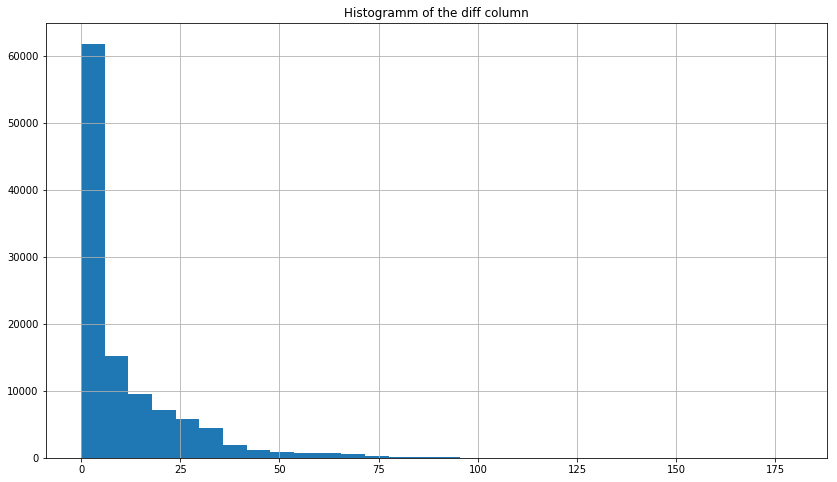

In [15]:
# Plot a histogramm in order to see the distribution of the diff column
df['diff'].hist(bins=30,figsize=(14,8))
plt.title('Histogramm of the diff column');

>The data is strongly skewed to the right. It seems that many appointments are taken rather on a short notice.

In [22]:
# Create two new dataframes in which the yes and no for no-show are separated in order to calculate the mean
df_yes = df[df['No-show'] == 'Yes']
df_no = df[df['No-show'] == 'No']

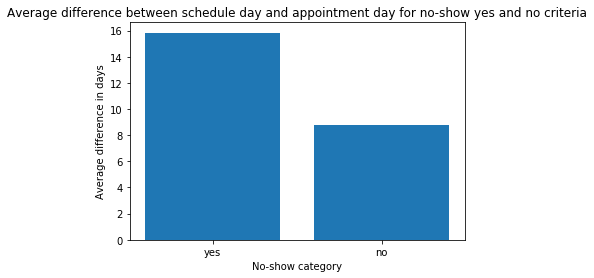

In [125]:
# Plot the means for the two categories of no-show
plt.bar([1, 2], [df_yes['diff'].mean(), df_no['diff'].mean()], tick_label=['yes', 'no']) 
plt.title('Average difference between schedule day and appointment day for no-show yes and no criteria') 
plt.xlabel('No-show category') 
plt.ylabel('Average difference in days');

>As the average days between schedule day and appointment day is much higher for no-show appointments, it seems that patients who are scheduling the appointment on short notice seem to be more reliable in showing up to their appointment.

### Research Question 2: How do the columns with boolean variables impact whether the patient showed up or not

In [122]:
# Investigate the single variable and the dependancy on no-show and plot accordingly
def inv_var(variable):
    
    # Investigate the single variable regarding the share if 0 or 1
    df[variable].value_counts().plot(kind='pie', figsize=(8,8))
    plt.title('Share of number {} applies or not'.format(variable))
    plt.show();
    
    # Create two new dataframes that contain the number of occurences the patient was showing up given that he has / has not fullfiled the criteria
    df_no_0 = df_no[df_no[variable] == 0]
    df_no_1 = df_no[df_no[variable] == 1]

    print("\n")
    
    # Calculate the propability that a patient was showing up given that he has / has not fullfiled the criteria
    prob_no_0 = df_no_0.shape[0]/df[df[variable] == 0].shape[0]
    prob_no_1 = df_no_1.shape[0]/df[df[variable] == 1].shape[0]

    # Plot the propabilities
    plt.bar([1, 2], [prob_no_0, prob_no_1], tick_label=[0, 1]) 
    plt.title('Propability that a patient showed up based on whether {} applies or not'.format(variable)) 
    plt.xlabel('{} applies'.format(variable)) 
    plt.ylabel('Propability of showing up')
    plt.show();
    
    print("\n"*3)

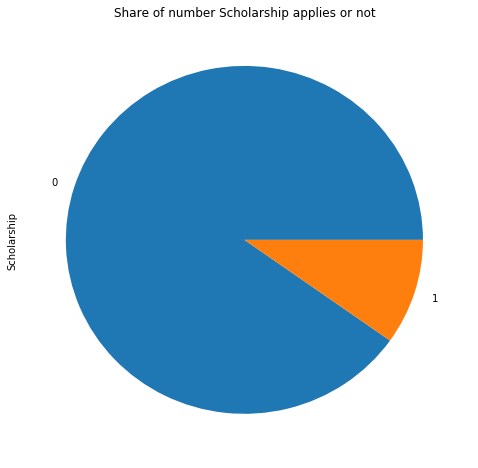

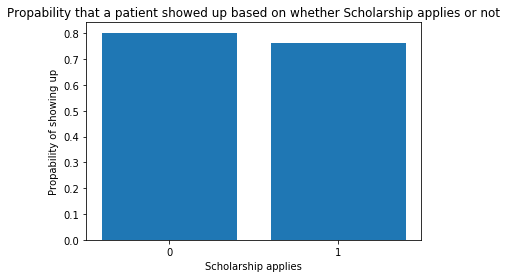

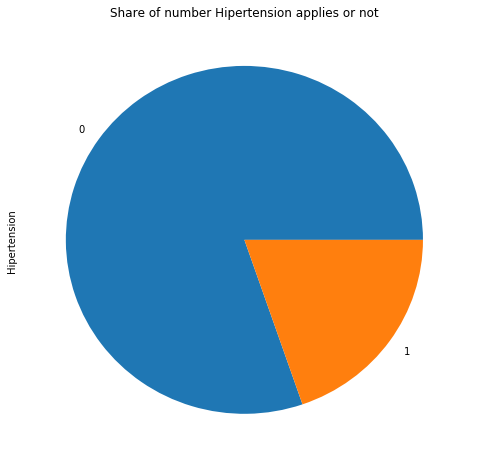

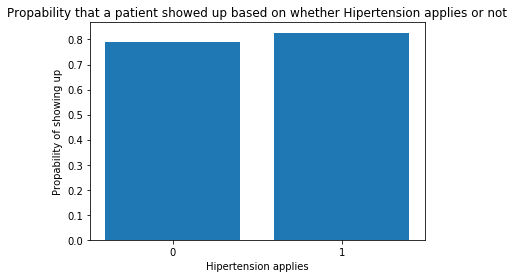

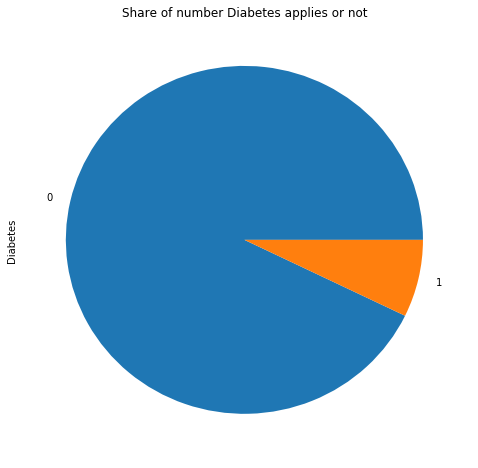

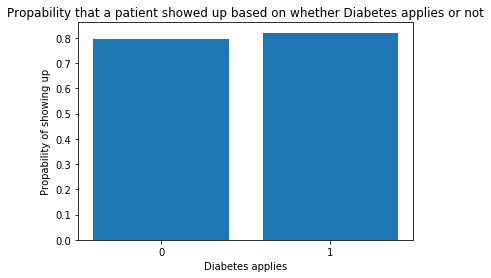

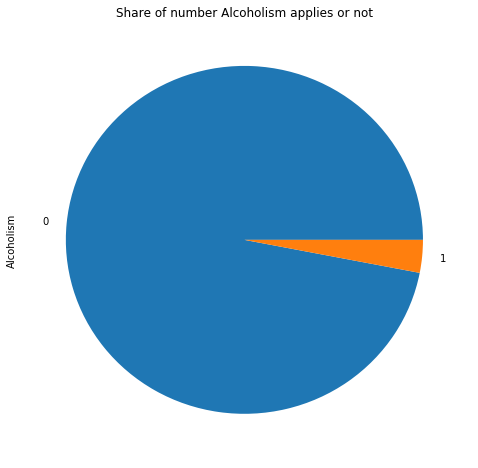

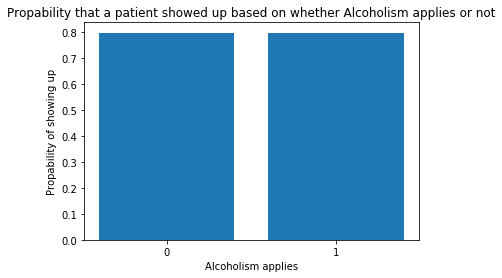

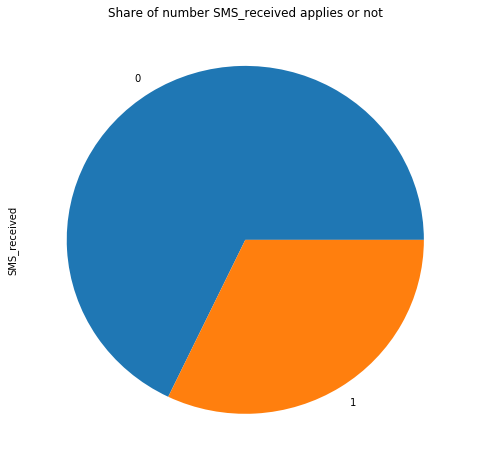

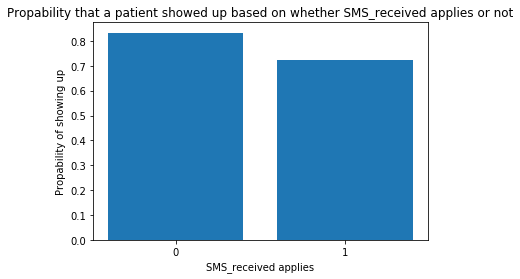

In [123]:
# Select the columns with boolean values. Handcap column is not boolean, therefore I do not consider it here.
col = np.append(df.columns[7:11], df.columns[12])

# Run the function in order to get the plots
for variable in col:
    inv_var(variable)

#### Observations:  

>**Scholarship**  
The share of patients that have a scholarship is fairly low.  
The propability of showing up is slightly higher if no scholarship is given.  
  
> **Hipertension**  
The share of patients that have hipertension is fairly low, but still is the one with the biggest share of illnesses (not considering Handcap).  
The propability of showing up is slightly higher if the patient has hipertension.

> **Diabetes**  
The share of patients that have diabetes is quite low.  
The propability of showing up is slightly higher if the patient has diabetes.

> **Alcoholism**  
The share of patients that have alcoholism is quite low.  
The propability of showing up is almost similar for both cases if the patient has alcoholism or not.

> **SMS received**  
Quite a share of patients have received an SMS but still less than 50%.  
The propability of showing up is higher in case the SMS was received. This is surprising as one would expect that receiving an SMS would increase the show up propability. In fact the data indicates the exact opposite.

<a id='conclusions'></a>
## Conclusions

> **Research Question 1: How does the time of scheduling the appointment affect whether the patient showed up or not**: The average days between schedule day and appointment is 10 days. The histogram of the column that calculates the difference shows that it is strongly skewed to the right. The average and the skeweness to the right of the distribution suggest that patients take appointments rather on short-notice than long term. As the average days between schedule day and appointment day is much higher for no-show appointments, it seems that patients who are scheduling the appointment on short notice seem to be more reliable in showing up to their appointment. A further analysis could look into how reliable patients with same-day scheduled appointments are.

> **Research Question 2: How do the columns with boolean variables impact whether the patient showed up or not**: Here it was analyzed which impact the variables scholarship, hipertension, diabetes, alcoholism and sms received have on the propability of showing up to the appointment. The variables scholarship, hipertension, diabetes and alcoholism have an insignificant impact on the propability of showing up.
The propability of showing up is higher in case the SMS was received. This is surprising as one would expect that receiving an SMS would increase the show up propability. In fact the data indicates the exact opposite. It could also be that the SMS does not have an influence at all and the propability of showing up is random accordingly.